In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [46]:
data = pd.read_csv("C:/Users/deepc/Downloads/V/Close.csv")

In [47]:
data.head()

,Date,Close,High,Low,Open,Adj Close,Volume
0,8/19/2004,2.499133,2.591785,2.390042,2.490664,2.499133,897427216
1,8/20/2004,2.697639,2.716817,2.503118,2.515820,2.697639,458857488
2,8/23/2004,2.724787,2.826406,2.716070,2.758411,2.724787,366857939
3,8/24/2004,2.611960,2.779581,2.579581,2.770615,2.611960,306396159
4,8/25/2004,2.640104,2.689918,2.587302,2.614201,2.640104,184645512


In [48]:
data.tail()

,Date,Close,High,Low,Open,Adj Close,Volume
4837,11/6/2023,131.449997,131.559998,129.929993,130.220001,131.449997,15360400
4838,11/7/2023,132.399994,133.279999,131.139999,131.979996,132.399994,19223800
4839,11/8/2023,133.259995,133.539993,132.160004,132.360001,133.259995,15093600
4840,11/9/2023,131.690002,133.960007,131.509995,133.360001,131.690002,17976500
4841,11/10/2023,134.059998,134.270004,130.869995,131.529999,134.059998,20872900


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4842 entries, 0 to 4841
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4842 non-null   object 
 1   Close      4842 non-null   float64
 2   High       4842 non-null   float64
 3   Low        4842 non-null   float64
 4   Open       4842 non-null   float64
 5   Adj Close  4842 non-null   float64
 6   Volume     4842 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 264.9+ KB


In [50]:
data.isnull().sum()

Date         0
Close        0
High         0
Low          0
Open         0
Adj Close    0
Volume       0
dtype: int64

In [51]:
col = data['Close']

Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1

outliers = col[(col < (Q1 - 3*IQR)) | (col > (Q3 + 3*IQR))]

print(outliers)

Series([], Name: Close, dtype: float64)


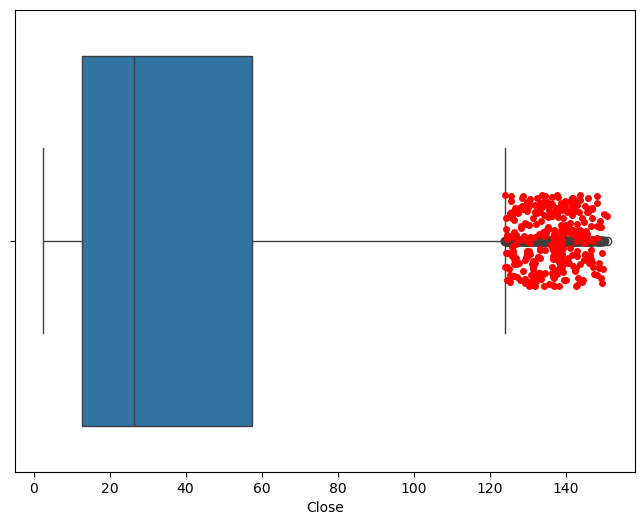

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.boxplot(x=col)
outliers = col[(col < (Q1 - 1.5*IQR)) | (col > (Q3 + 1.5*IQR))]

# Highlight the outliers
sns.stripplot(x=outliers, color='red', size=5)

plt.show()


In [53]:
length_data = len(data)     # rows that data has
split_ratio = 0.8     # %80 train + %20 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 4842
Train data length : 3874
Validation data lenth : 968


In [54]:
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data length :", length_validation)


Data length : 4842
Train data length : 3874
Validation data length : 968


In [55]:
train_data = data[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Close
0,2004-08-19,2.499133
1,2004-08-20,2.697639
2,2004-08-23,2.724787
3,2004-08-24,2.611960
4,2004-08-25,2.640104
...,...,...
3869,2020-01-02,68.368500
3870,2020-01-03,68.032997
3871,2020-01-06,69.710503
3872,2020-01-07,69.667000


In [56]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Close
3874,2020-01-09,70.991501
3875,2020-01-10,71.486504
3876,2020-01-13,71.961502
3877,2020-01-14,71.543999
3878,2020-01-15,71.959999
...,...,...
4837,2023-11-06,131.449997
4838,2023-11-07,132.399994
4839,2023-11-08,133.259995
4840,2023-11-09,131.690002


In [57]:
dataset_train = train_data.Close.values
dataset_train.shape

(3874,)

In [58]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(3874, 1)

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(3874, 1)

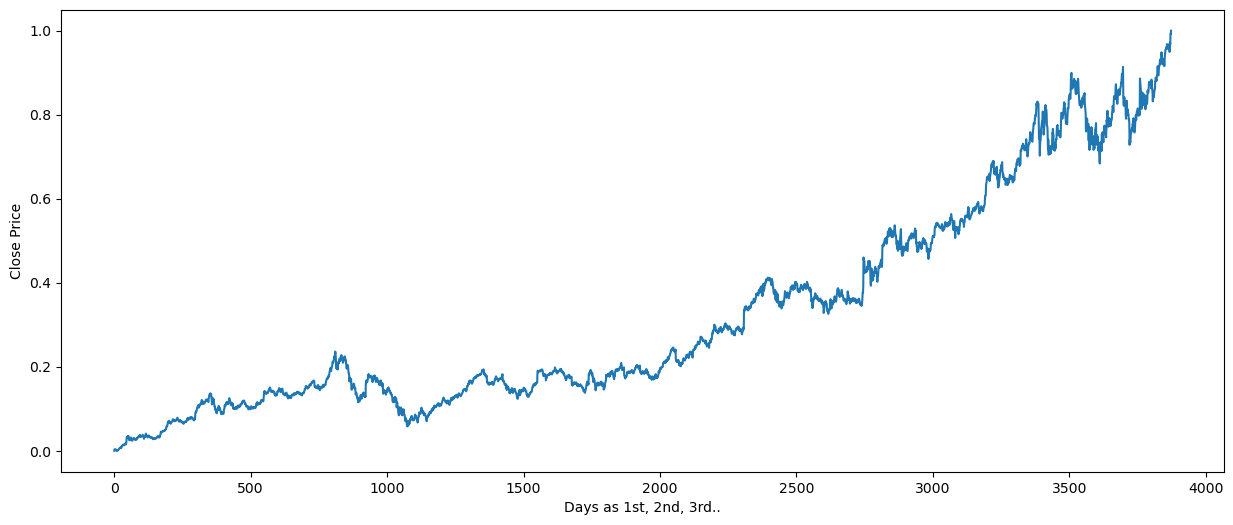

In [60]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Close Price")
plt.show()

In [61]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [62]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (3824, 50)
Shape of y_train before reshape : (3824,)


In [63]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (3824, 50, 1)
Shape of y_train after reshape : (3824, 1)


In [64]:
X_train[0]

array([[1.21375932e-04],
       [3.05242965e-03],
       [3.45328565e-03],
       [1.78732903e-03],
       [2.20289319e-03],
       [2.90531969e-03],
       [2.25805768e-03],
       [7.35532217e-04],
       [8.67923447e-04],
       [8.82702106e-05],
       [5.51644770e-04],
       [0.00000000e+00],
       [5.77392879e-04],
       [8.42185881e-04],
       [8.45861166e-04],
       [1.95649775e-03],
       [2.75453444e-03],
       [4.22190950e-03],
       [4.40946169e-03],
       [5.13394692e-03],
       [6.42847447e-03],
       [7.11618221e-03],
       [6.55718688e-03],
       [6.75576844e-03],
       [7.65311879e-03],
       [7.28902973e-03],
       [6.71165093e-03],
       [9.87439193e-03],
       [1.14263443e-02],
       [1.08820536e-02],
       [1.19779856e-02],
       [1.28900230e-02],
       [1.41073132e-02],
       [1.36329093e-02],
       [1.42838360e-02],
       [1.38719506e-02],
       [1.29635850e-02],
       [1.37505923e-02],
       [1.50377517e-02],
       [1.54422830e-02],


In [65]:
y_train[0]

array([0.03333019])

In [66]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from keras.optimizers import Adam

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regularization
regressor.add(
    SimpleRNN(units=100, 
              activation="tanh", 
              return_sequences=True, 
              input_shape=(X_train.shape[1], 1))
             )

regressor.add(
    Dropout(0.2)
)

# adding second RNN layer and dropout regularization
regressor.add(
    SimpleRNN(units=100, 
              activation="tanh", 
              return_sequences=True)
             )

regressor.add(
    Dropout(0.2)
)

# adding third RNN layer and dropout regularization
regressor.add(
    SimpleRNN(units=100, 
              activation="tanh", 
              return_sequences=True)
             )

regressor.add(
    Dropout(0.2)
)

# adding fourth RNN layer and dropout regularization
regressor.add(
    SimpleRNN(units=100)
             )

regressor.add(
    Dropout(0.2)
)

# adding the output layer
regressor.add(Dense(units=1))

# compiling RNN with a lower learning rate
regressor.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss="mean_squared_error",
    metrics=["accuracy"]
)

# fitting the RNN with more epochs
history = regressor.fit(X_train, y_train, epochs=200, batch_size=64)


Epoch 1/200
60/60 [==============================] - 8s 80ms/step - loss: 0.3509 - accuracy: 2.6151e-04
Epoch 2/200
60/60 [==============================] - 5s 82ms/step - loss: 0.2472 - accuracy: 0.0000e+00
Epoch 3/200
60/60 [==============================] - 5s 75ms/step - loss: 0.2143 - accuracy: 2.6151e-04
Epoch 4/200
60/60 [==============================] - 5s 79ms/step - loss: 0.1706 - accuracy: 2.6151e-04
Epoch 5/200
60/60 [==============================] - 5s 81ms/step - loss: 0.1540 - accuracy: 2.6151e-04
Epoch 6/200
60/60 [==============================] - 5s 82ms/step - loss: 0.1245 - accuracy: 2.6151e-04
Epoch 7/200
60/60 [==============================] - 5s 81ms/step - loss: 0.1142 - accuracy: 2.6151e-04
Epoch 8/200
60/60 [==============================] - 5s 81ms/step - loss: 0.1019 - accuracy: 2.6151e-04
Epoch 9/200
60/60 [==============================] - 5s 81ms/step - loss: 0.0880 - accuracy: 2.6151e-04
Epoch 10/200
60/60 [==============================] - 5s 84ms/st

In [67]:
# Losses
history.history["loss"]

[0.3509078025817871,
 0.247178852558136,
 0.21426112949848175,
 0.17060400545597076,
 0.15397869050502777,
 0.12449141591787338,
 0.1141894981265068,
 0.1018805131316185,
 0.087982676923275,
 0.0758790448307991,
 0.0713837668299675,
 0.0663711205124855,
 0.06138183921575546,
 0.05684185028076172,
 0.05494500324130058,
 0.04867012798786163,
 0.04370304197072983,
 0.04374713450670242,
 0.044026874005794525,
 0.03855632618069649,
 0.03976358845829964,
 0.036689333617687225,
 0.033791329711675644,
 0.03148048371076584,
 0.030540674924850464,
 0.02931087650358677,
 0.027938077226281166,
 0.02670375257730484,
 0.02463880553841591,
 0.025374742224812508,
 0.023717738687992096,
 0.023208362981677055,
 0.02105729468166828,
 0.021713830530643463,
 0.020993392914533615,
 0.020462868735194206,
 0.019344855099916458,
 0.019143549725413322,
 0.01784347929060459,
 0.01704942248761654,
 0.0166521817445755,
 0.015541743487119675,
 0.015448950231075287,
 0.015057451091706753,
 0.014719504863023758,
 0.0

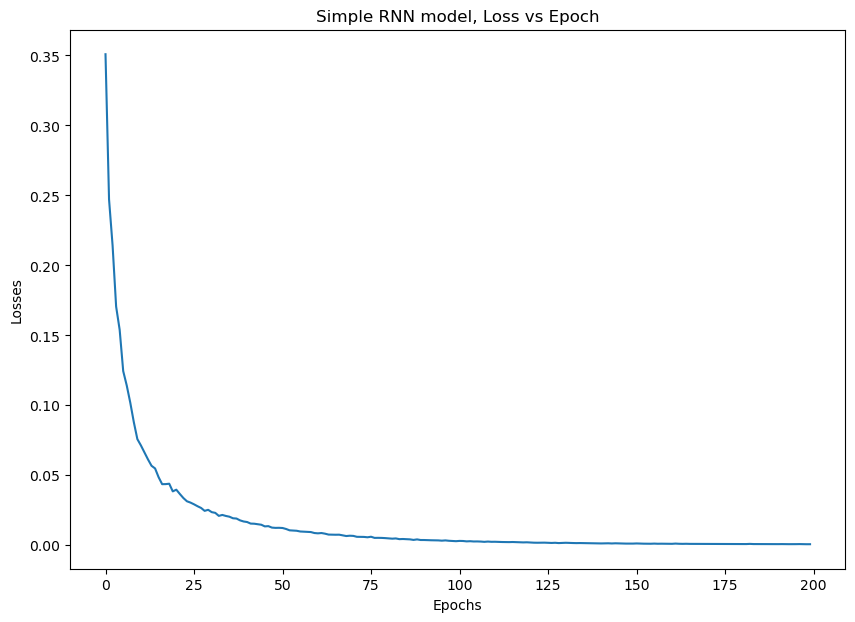

In [68]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

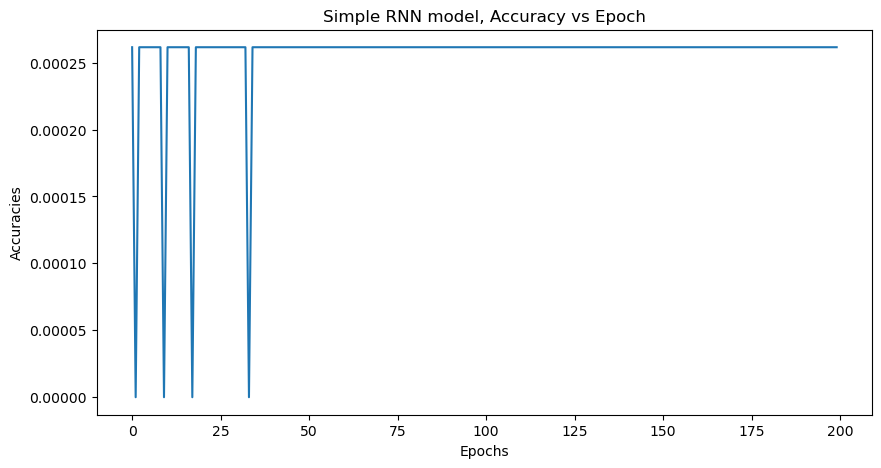

In [69]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()


In [70]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

120/120 [==============================] - 3s 25ms/step


(3824, 1)

In [71]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(3824, 1)

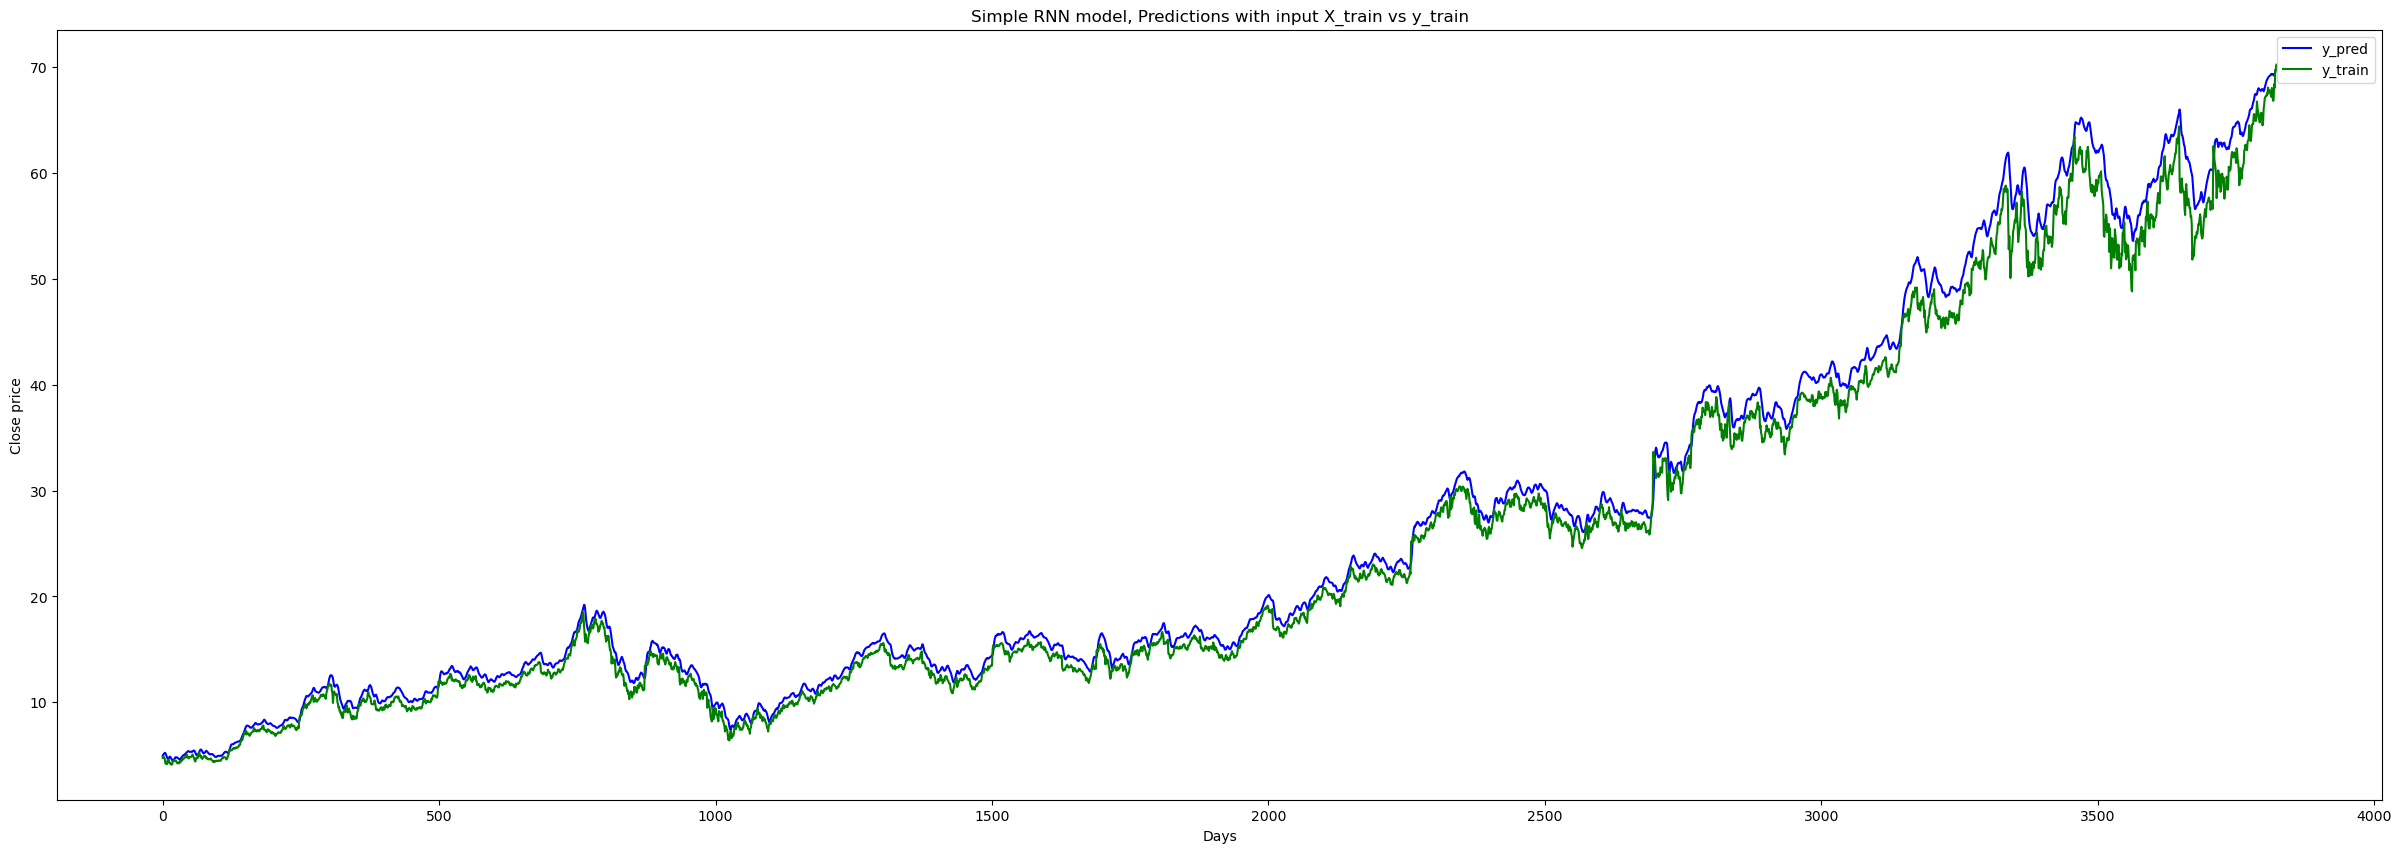

In [72]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [73]:
dataset_validation = validation_data.Close.values  # getting "Close" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling close values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)


Shape of scaled validation dataset : (968, 1)


In [74]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [75]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [76]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (918, 50)
Shape of y_test before reshape : (918,)


In [77]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [78]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (918, 50, 1)
Shape of y_test after reshape : (918, 1)


In [79]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

29/29 [==============================] - 1s 23ms/step
Shape of y_pred_of_test : (918, 1)


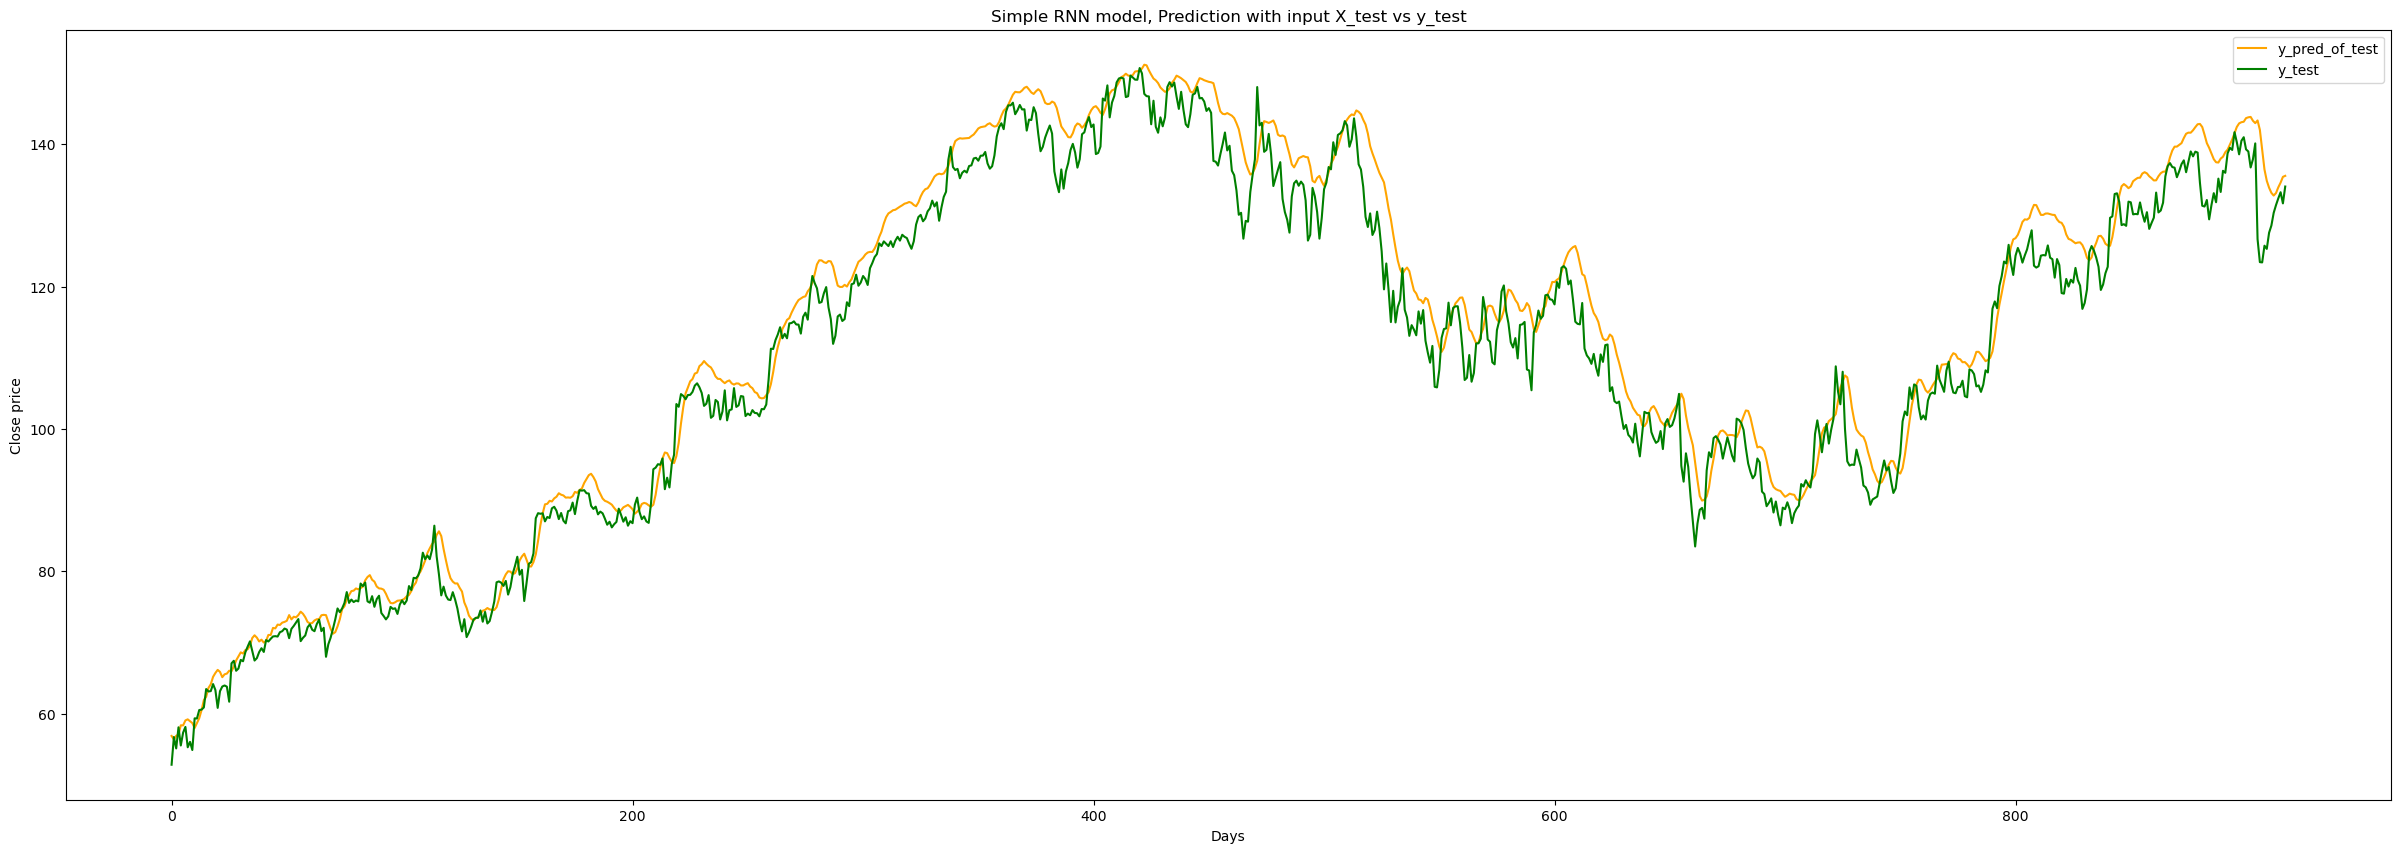

In [80]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

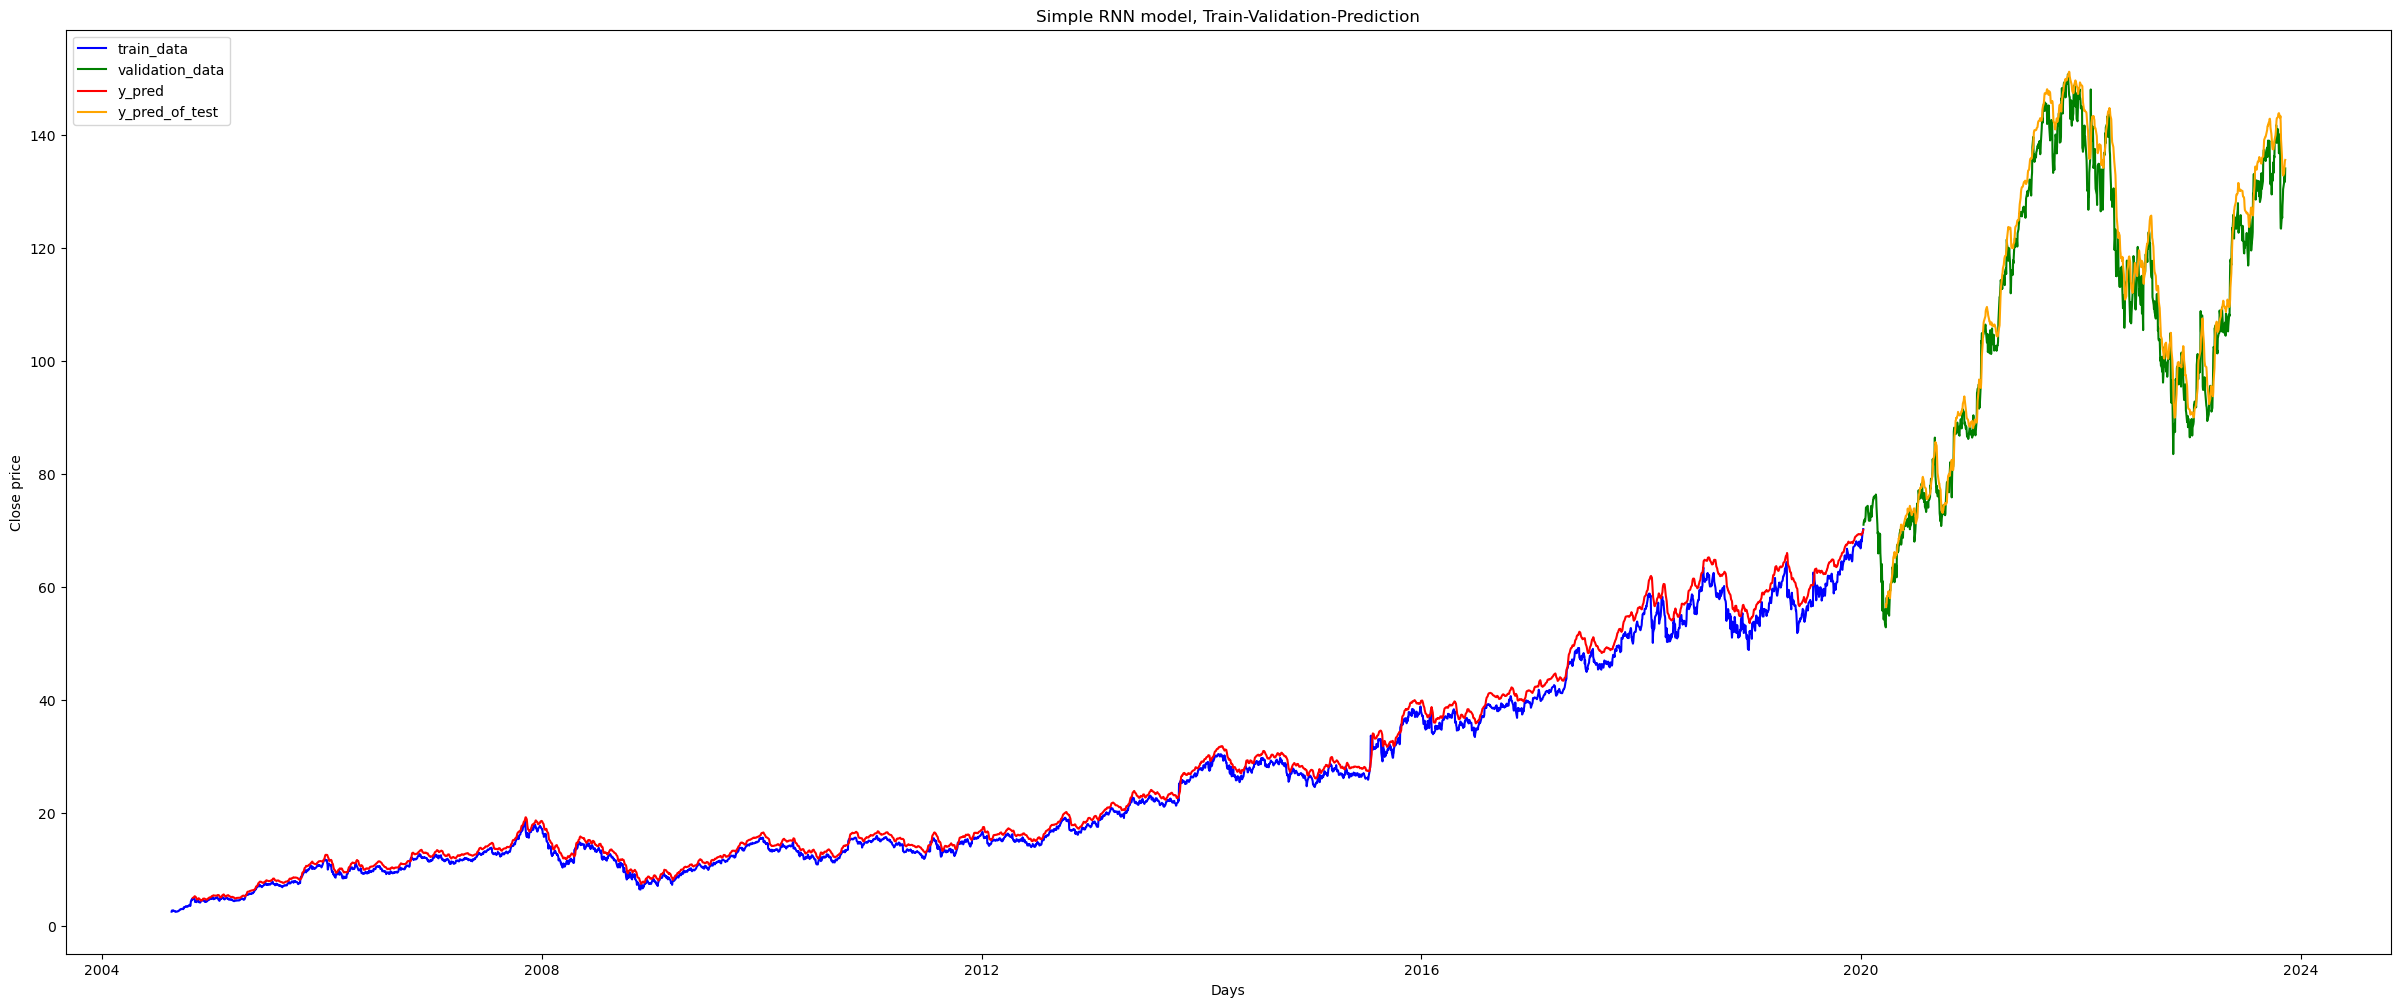

In [81]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Close, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Close, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [82]:
#LSTM
y_train = scaler.fit_transform(y_train)

In [83]:
# Save Simple RNN model
regressor.save("close_simple_rnn_model.h5")

In [84]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

model_lstm = Sequential()
model_lstm.add(
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # Increase LSTM units
model_lstm.add(
    LSTM(128, return_sequences=False))  # Increase LSTM units
model_lstm.add(Dense(128))  # Increase dense layer units
model_lstm.add(Dense(1))
model_lstm.compile(loss="mean_squared_error", optimizer=Adam(lr=0.0001), metrics=["accuracy"])  # Adjust learning rate
history2 = model_lstm.fit(X_train, y_train, epochs=200, batch_size=32)  # Increase epochs and adjust batch size


Epoch 1/200
120/120 [==============================] - 21s 135ms/step - loss: 0.0044 - accuracy: 2.6151e-04
Epoch 2/200
120/120 [==============================] - 17s 139ms/step - loss: 2.1225e-04 - accuracy: 5.2301e-04
Epoch 3/200
120/120 [==============================] - 17s 140ms/step - loss: 2.1256e-04 - accuracy: 5.2301e-04
Epoch 4/200
120/120 [==============================] - 17s 140ms/step - loss: 2.4402e-04 - accuracy: 5.2301e-04
Epoch 5/200
120/120 [==============================] - 16s 137ms/step - loss: 1.9992e-04 - accuracy: 5.2301e-04
Epoch 6/200
120/120 [==============================] - 17s 140ms/step - loss: 2.2991e-04 - accuracy: 5.2301e-04
Epoch 7/200
120/120 [==============================] - 17s 141ms/step - loss: 2.1143e-04 - accuracy: 5.2301e-04
Epoch 8/200
120/120 [==============================] - 17s 141ms/step - loss: 2.3427e-04 - accuracy: 5.2301e-04
Epoch 9/200
120/120 [==============================] - 17s 140ms/step - loss: 1.8963e-04 - accuracy: 5.2301e

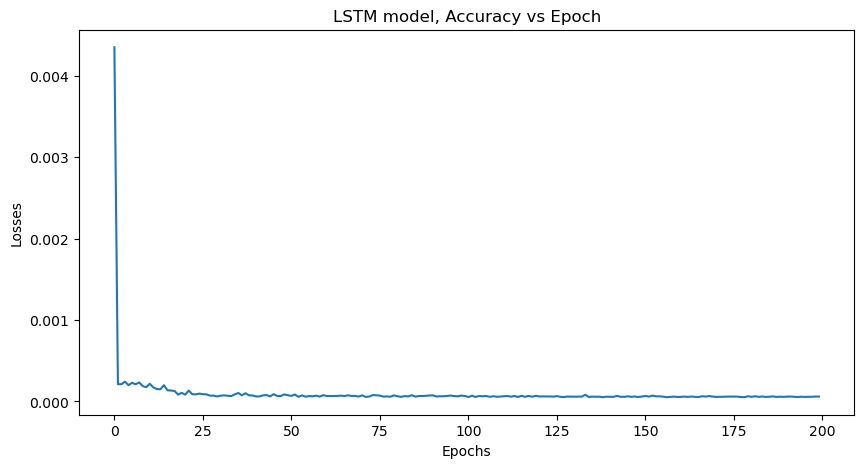

In [85]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

29/29 [==============================] - 4s 69ms/step


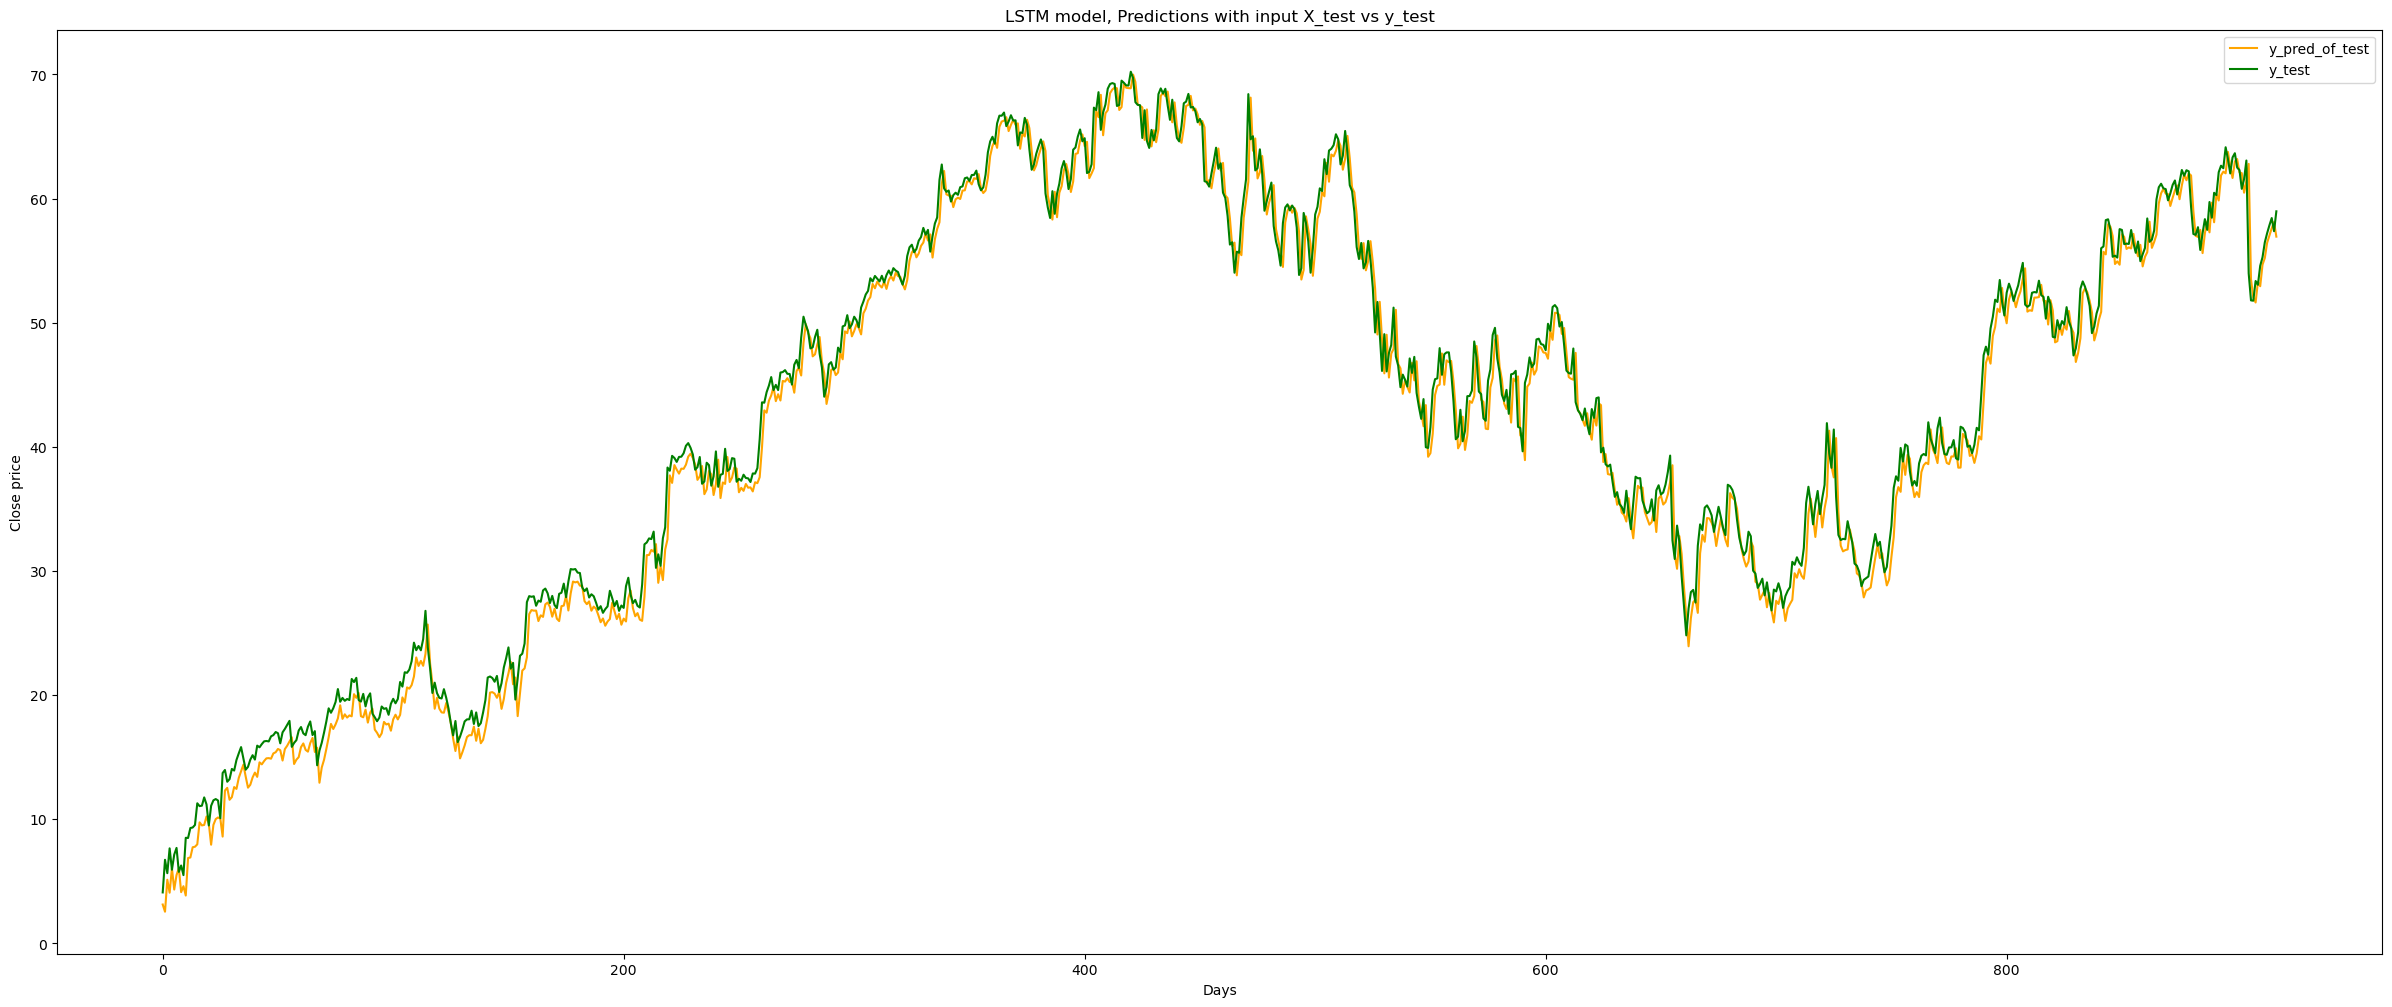

In [86]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [87]:
data.iloc[-1]


Date         11/10/2023
Close        134.059998
High         134.270004
Low          130.869995
Open         131.529999
Adj Close    134.059998
Volume         20872900
Name: 4841, dtype: object

In [88]:
X_input = data.iloc[-time_step:].Close.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.73224071],
        [0.72732287],
        [0.65409818],
        [0.69945348],
        [0.7540983 ],
        [0.78360697],
        [0.69235022],
        [0.77049191],
        [0.851913  ],
        [0.81420794],
        [0.85027372],
        [0.84316963],
        [0.61147528],
        [0.43497274],
        [0.42896177],
        [0.47923491],
        [0.33060092],
        [0.44043755],
        [0.53169431],
        [0.461749  ],
        [0.64316938],
        [0.54098383],
        [0.70327902],
        [0.68797853],
        [0.83770481],
        [0.87978156],
        [0.86338794],
        [1.        ],
        [0.9229506 ],
        [0.82950842],
        [0.93388023],
        [0.96120265],
        [0.86775963],
        [0.85136602],
        [0.72896215],
        [0.79234951],
        [0.91366108],
        [0.17868839],
        [0.00218584],
        [0.        ],
        [0.12841525],
        [0.10382525],
        [0.22786881],
        [0.2830602 ],
        [0.38087406],
        [0

In [89]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Close price prediction for tomorrow     :", simple_RNN_prediction[0,0])
print("LSTM prediction, Close price prediction for tomorrow:", LSTM_prediction[0,0])

1/1 [==============================] - 0s 32ms/step
Simple RNN, Close price prediction for tomorrow     : 132.52692
LSTM prediction, Close price prediction for tomorrow: 133.86955


In [90]:
# Save LSTM model
model_lstm.save("close_lstm_model.h5")

In [91]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the RandomForest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train.reshape((X_train.shape[0], X_train.shape[1])), y_train.flatten())

RandomForestRegressor(random_state=42)

In [92]:
# Predictions with the RandomForest Regressor on training data
y_pred_rf_train = rf_regressor.predict(X_train.reshape((X_train.shape[0], X_train.shape[1])))


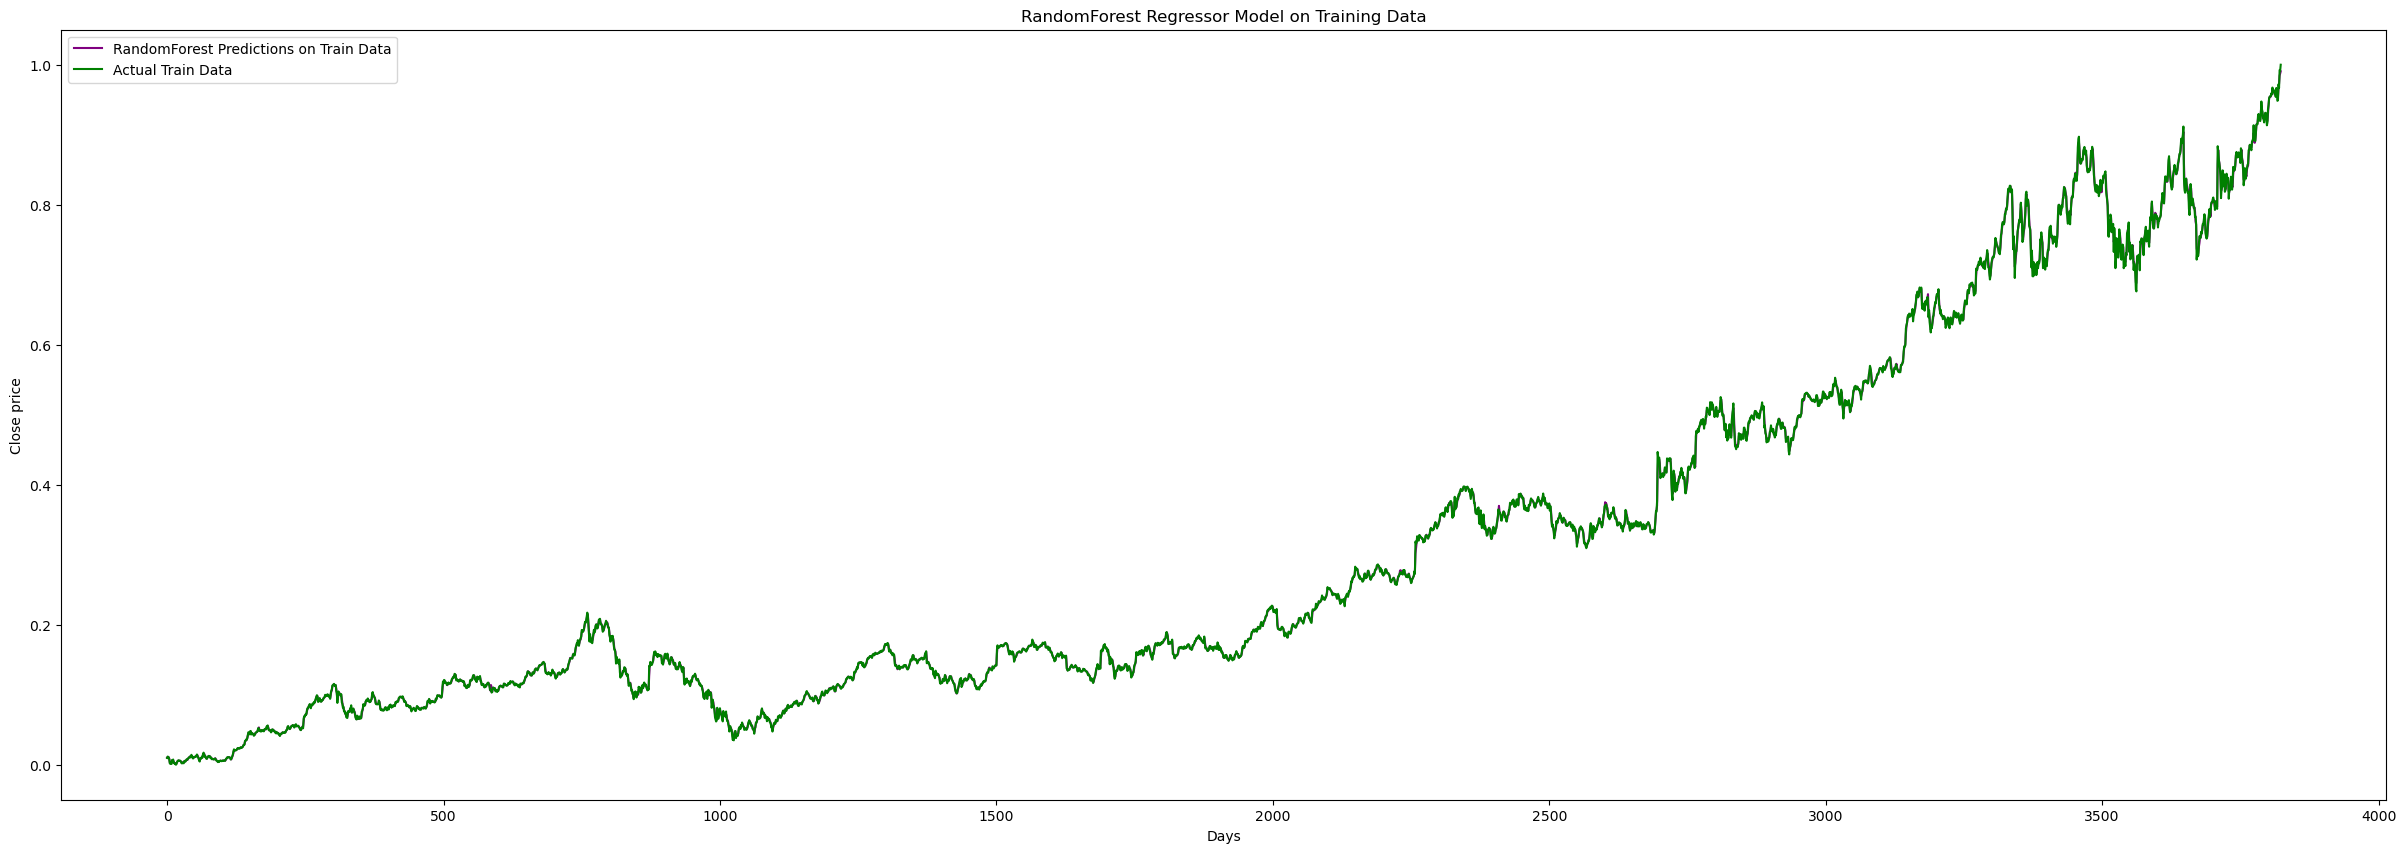

In [93]:
# Visualize the RandomForest predictions on training data
plt.figure(figsize=(30, 10))
plt.plot(y_pred_rf_train, label="RandomForest Predictions on Train Data", color="purple")
plt.plot(y_train.flatten(), label="Actual Train Data", color="green")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("RandomForest Regressor Model on Training Data")
plt.legend()
plt.show()

In [94]:
# Predictions with the RandomForest Regressor on validation data
y_pred_rf_validation = rf_regressor.predict(X_test.reshape((X_test.shape[0], X_test.shape[1])))


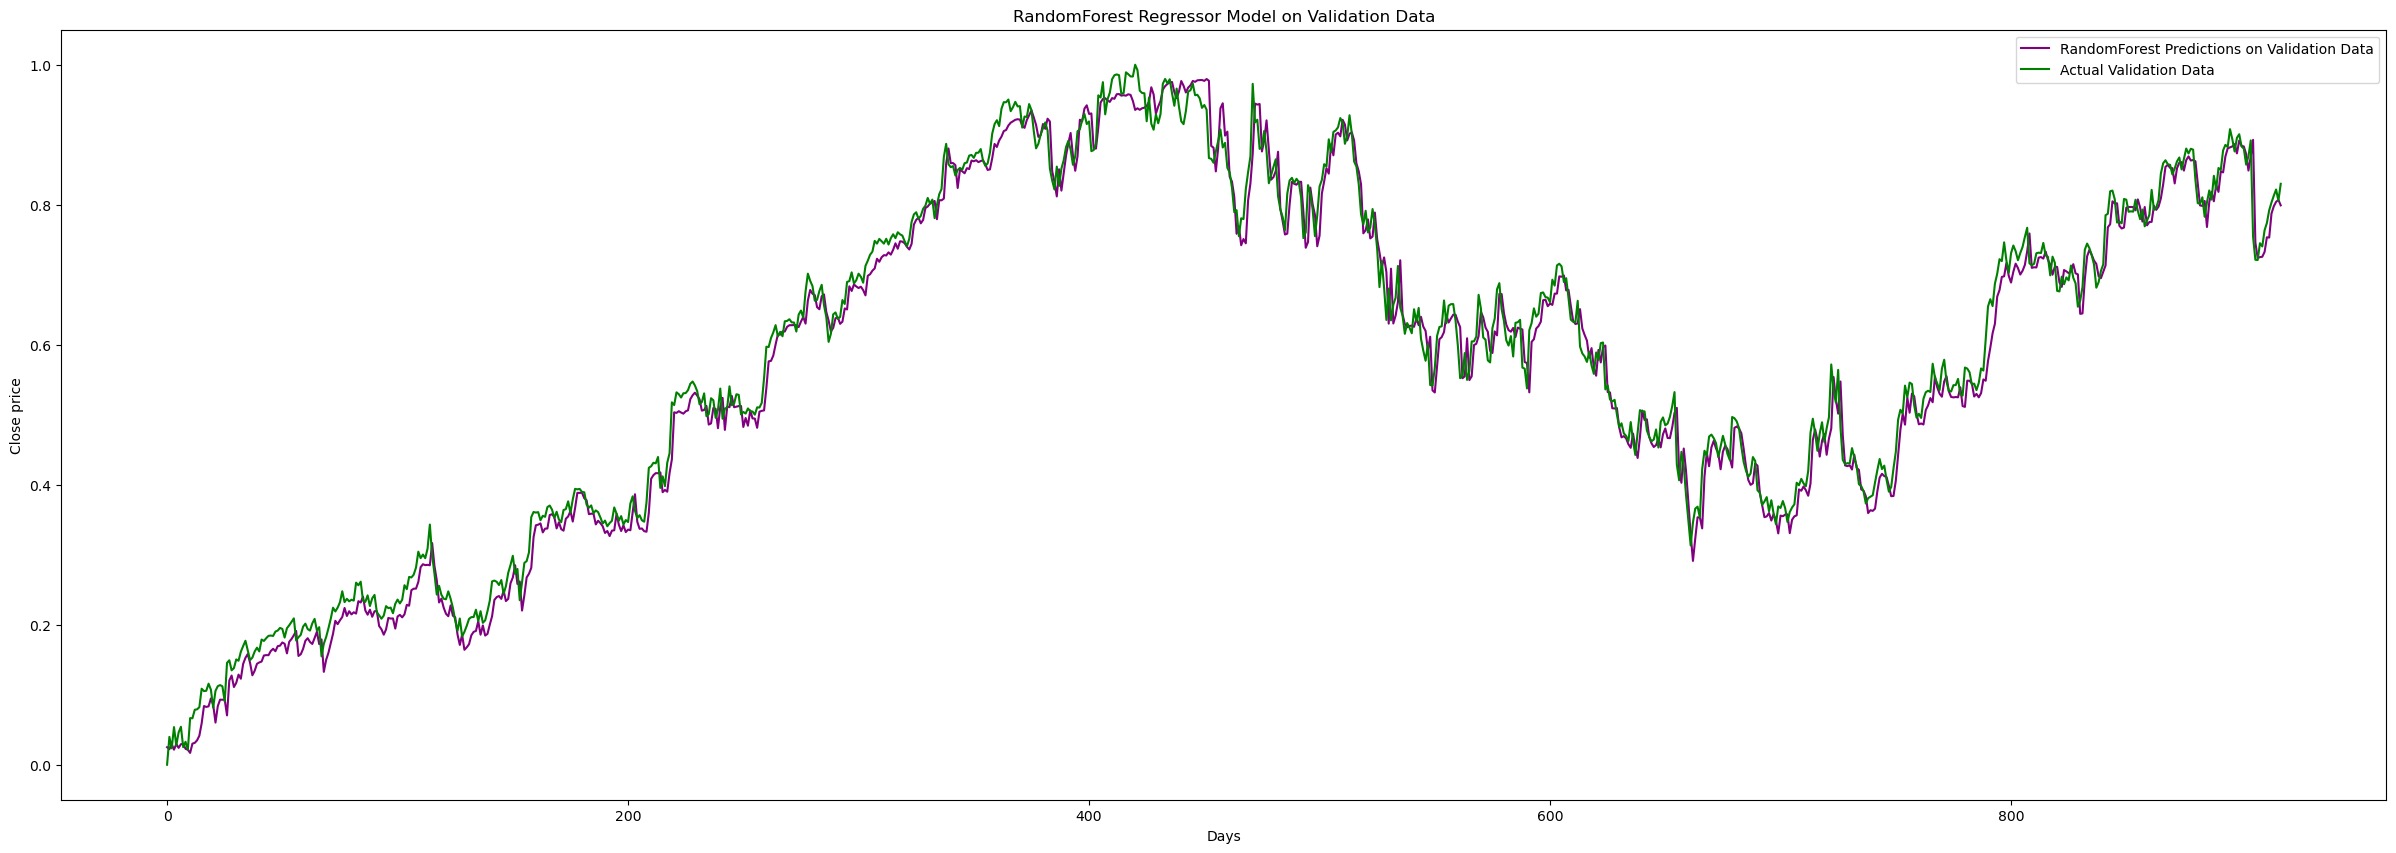

In [95]:
# Visualize the RandomForest predictions on validation data
plt.figure(figsize=(30, 10))
plt.plot(y_pred_rf_validation, label="RandomForest Predictions on Validation Data", color="purple")
plt.plot(y_test.flatten(), label="Actual Validation Data", color="green")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("RandomForest Regressor Model on Validation Data")
plt.legend()
plt.show()

In [96]:
# Predictions for the next day using RandomForest Regressor
X_input_rf = X_test[-1].reshape((1, X_test.shape[1]))  # Use the last sequence in the validation data
rf_prediction = rf_regressor.predict(X_input_rf)
rf_prediction = scaler.inverse_transform(rf_prediction.reshape(-1, 1))


In [97]:
# Save RandomForest model
import joblib
joblib.dump(rf_regressor, "close_random_forest_model.joblib")

['close_random_forest_model.joblib']

In [98]:
print("RandomForest Regressor, Close price prediction for tomorrow:", rf_prediction[0, 0])

RandomForest Regressor, Close price prediction for tomorrow: 138.0237612797331


In [99]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape X_train and X_test for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [100]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam

model_cnn = Sequential()

model_cnn.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))  # Increase filters
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu'))  # Add another Conv1D layer
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))  # Increase units in Dense layer
model_cnn.add(Dense(1))
model_cnn.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error', metrics=['accuracy'])  # Adjust learning rate
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=200, batch_size=32)  # Increase epochs and adjust batch size


Epoch 1/200
120/120 [==============================] - 2s 10ms/step - loss: 0.0036 - accuracy: 5.2301e-04
Epoch 2/200
120/120 [==============================] - 1s 10ms/step - loss: 6.0584e-04 - accuracy: 5.2301e-04
Epoch 3/200
120/120 [==============================] - 1s 10ms/step - loss: 4.6887e-04 - accuracy: 5.2301e-04
Epoch 4/200
120/120 [==============================] - 1s 9ms/step - loss: 4.1600e-04 - accuracy: 5.2301e-04
Epoch 5/200
120/120 [==============================] - 1s 9ms/step - loss: 4.6609e-04 - accuracy: 5.2301e-04
Epoch 6/200
120/120 [==============================] - 1s 9ms/step - loss: 4.4366e-04 - accuracy: 5.2301e-04
Epoch 7/200
120/120 [==============================] - 1s 10ms/step - loss: 4.3177e-04 - accuracy: 5.2301e-04
Epoch 8/200
120/120 [==============================] - 1s 10ms/step - loss: 3.6085e-04 - accuracy: 5.2301e-04
Epoch 9/200
120/120 [==============================] - 1s 10ms/step - loss: 3.2933e-04 - accuracy: 5.2301e-04
Epoch 10/200
120/

In [101]:
# Predictions with the CNN model on training data
y_pred_cnn_train = model_cnn.predict(X_train_cnn)

120/120 [==============================] - 1s 4ms/step


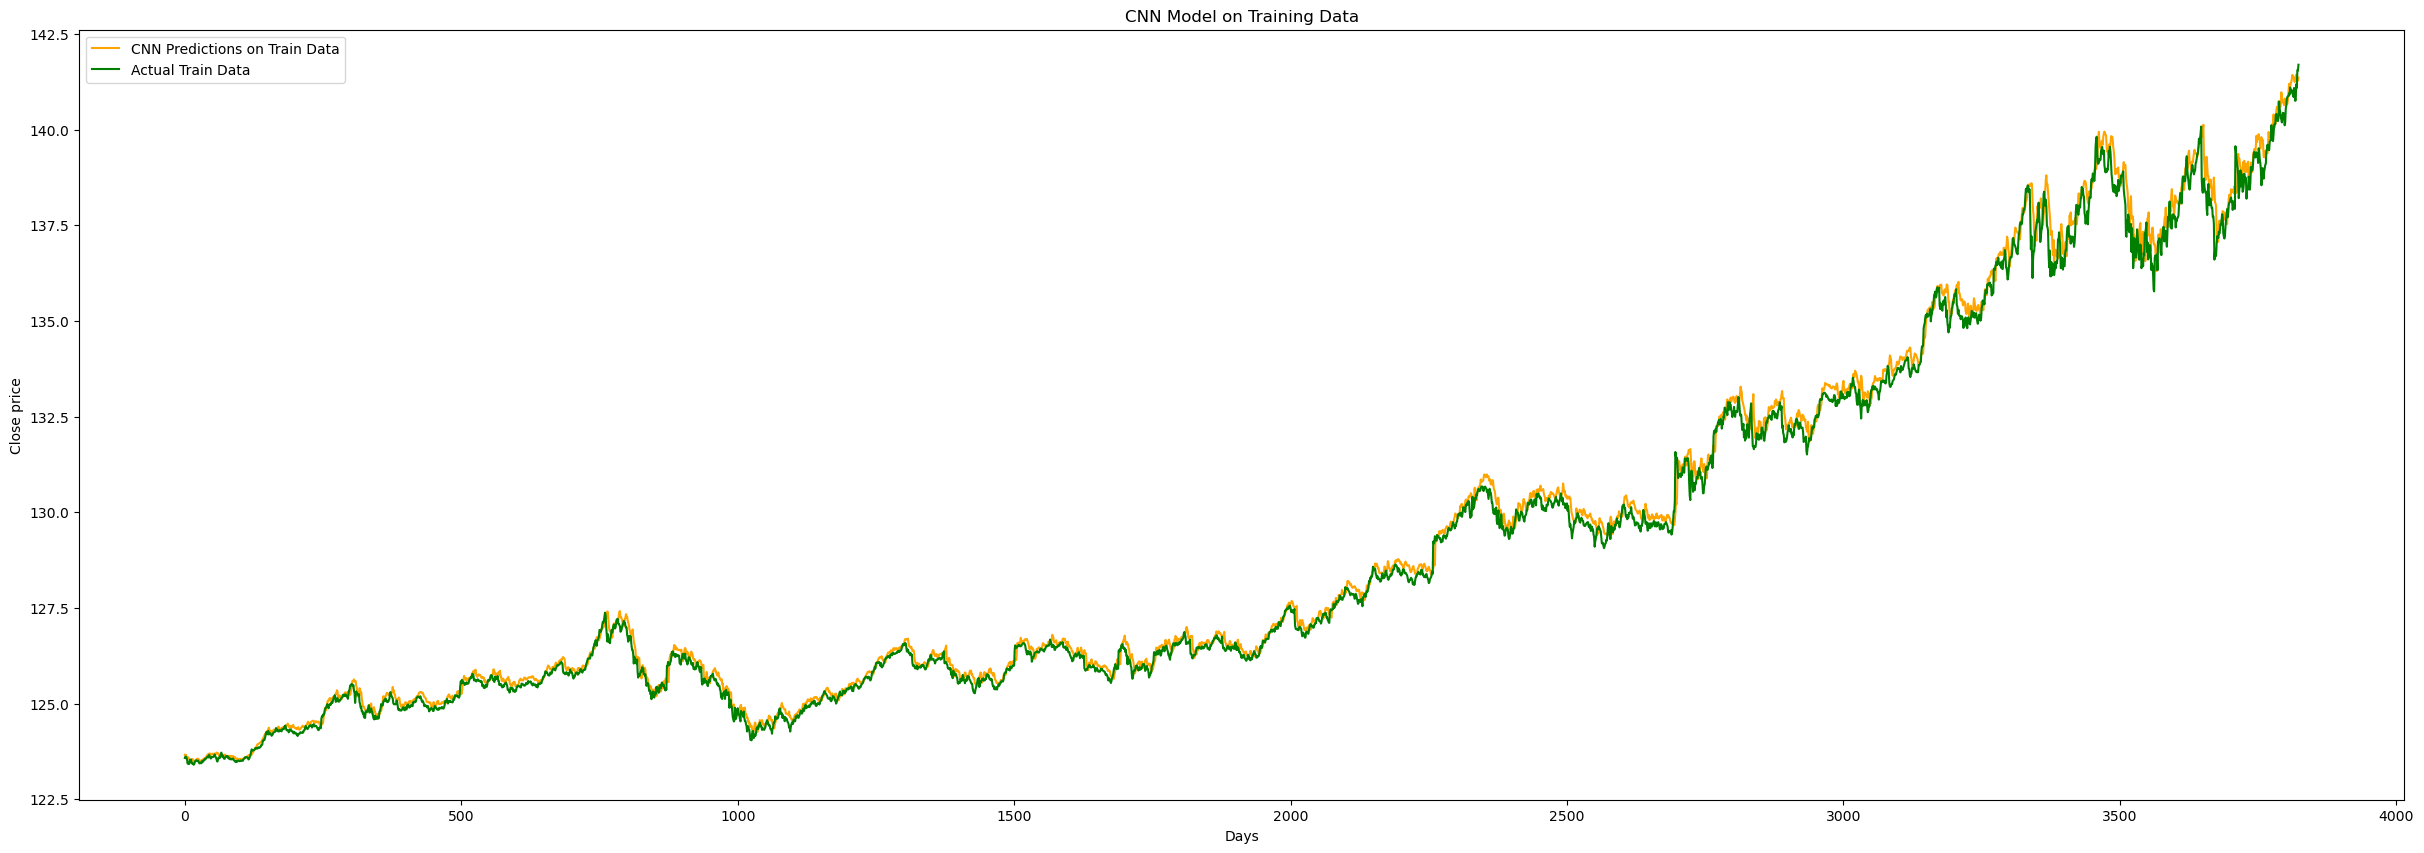

In [102]:
# Visualize the CNN predictions on training data
plt.figure(figsize=(30, 10))
plt.plot(scaler.inverse_transform(y_pred_cnn_train), label="CNN Predictions on Train Data", color="orange")
plt.plot(scaler.inverse_transform(y_train), label="Actual Train Data", color="green")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("CNN Model on Training Data")
plt.legend()
plt.show()

In [103]:
# Predictions with the CNN model on validation data
y_pred_cnn_validation = model_cnn.predict(X_test_cnn)

29/29 [==============================] - 0s 3ms/step


In [104]:
# Predictions for the next day using CNN
X_input_cnn = X_test_cnn[-1].reshape((1, X_test_cnn.shape[1], 1))  # Use the last sequence in the validation data
cnn_prediction = model_cnn.predict(X_input_cnn)
cnn_prediction = scaler.inverse_transform(cnn_prediction.reshape(-1, 1))

1/1 [==============================] - 0s 27ms/step


In [105]:
print("CNN Model, Close price prediction for tomorrow:", cnn_prediction[0, 0])

CNN Model, Close price prediction for tomorrow: 138.8001


In [106]:
# Save CNN model
model_cnn.save("close_cnn_model.h5")

In [107]:
from keras.models import Model, Sequential
from keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from keras.optimizers import Adam

In [108]:
# Generator model
generator = Sequential()
generator.add(Dense(120, input_dim=50))  # Adjust input_dim based on your sequence length
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(1, activation='tanh'))

In [109]:
# Discriminator model
discriminator = Sequential()
discriminator.add(Dense(128, input_dim=1))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(1, activation='sigmoid'))

In [110]:
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

In [111]:
# Combined GAN model
discriminator.trainable = False
gan_input = Input(shape=(50,))  # Adjust shape based on your sequence length
x = generator(gan_input)
gan_output = discriminator(x)

In [112]:
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [113]:
# Training GAN
batch_size = 32
epochs = 1000  # Adjust as needed


In [114]:
for epoch in range(epochs):

    # Train discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_prices = y_train[idx]
    noise = np.random.normal(0, 1, (batch_size, 50))  # Adjust 50 based on your sequence length
    generated_prices = generator.predict(noise)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_prices, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_prices, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 50))  # Adjust 50 based on your sequence length
    valid_labels = np.ones((batch_size, 1))

    g_loss = gan.train_on_batch(noise, valid_labels)

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")


1/1 [==============================] - 0s 124ms/step
Epoch 0, D Loss: 0.6808339059352875, G Loss: 0.7261723875999451
1/1 [==============================] - 0s 22ms/step
Epoch 100, D Loss: 0.6568806171417236, G Loss: 0.710599422454834
1/1 [==============================] - 0s 22ms/step
Epoch 200, D Loss: 0.6885276436805725, G Loss: 0.6854546666145325
1/1 [==============================] - 0s 21ms/step
Epoch 300, D Loss: 0.6807007789611816, G Loss: 0.7348207235336304
1/1 [==============================] - 0s 24ms/step
Epoch 400, D Loss: 0.6706334948539734, G Loss: 0.7596725821495056
1/1 [==============================] - 0s 39ms/step
Epoch 500, D Loss: 0.6825384497642517, G Loss: 0.7513062357902527
1/1 [==============================] - 0s 21ms/step
Epoch 600, D Loss: 0.6788268387317657, G Loss: 0.7430214285850525
1/1 [==============================] - 0s 23ms/step
Epoch 700, D Loss: 0.6785085797309875, G Loss: 0.7271988391876221
1/1 [==============================] - 0s 25ms/step
Epoch 

In [115]:
# Generate predictions using the trained GAN generator
noise_input = np.random.normal(0, 1, (1, 50))  # Adjust 50 based on your sequence length
gan_prediction = generator.predict(noise_input)
gan_prediction = scaler.inverse_transform(gan_prediction.reshape(-1, 1))

1/1 [==============================] - 0s 87ms/step


In [116]:

print("GAN Model, Close price prediction for tomorrow:", gan_prediction[0, 0])

GAN Model, Close price prediction for tomorrow: 125.865944


In [117]:
# Save GAN generator model
generator.save("close_gan_generator_model.h5")

In [118]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [119]:
# Get predictions from each model
y_pred_simple_rnn = scaler.inverse_transform(regressor.predict(X_test))
y_pred_lstm = scaler.inverse_transform(model_lstm.predict(X_test))
y_pred_rf = scaler.inverse_transform(rf_regressor.predict(X_test.reshape((X_test.shape[0], X_test.shape[1]))).reshape(-1, 1))
y_pred_cnn = scaler.inverse_transform(model_cnn.predict(X_test_cnn))


29/29 [==============================] - 0s 3ms/step


In [120]:
# Ensemble predictions
ensemble_predictions = np.mean([y_pred_simple_rnn, y_pred_lstm, y_pred_rf, y_pred_cnn], axis=0)


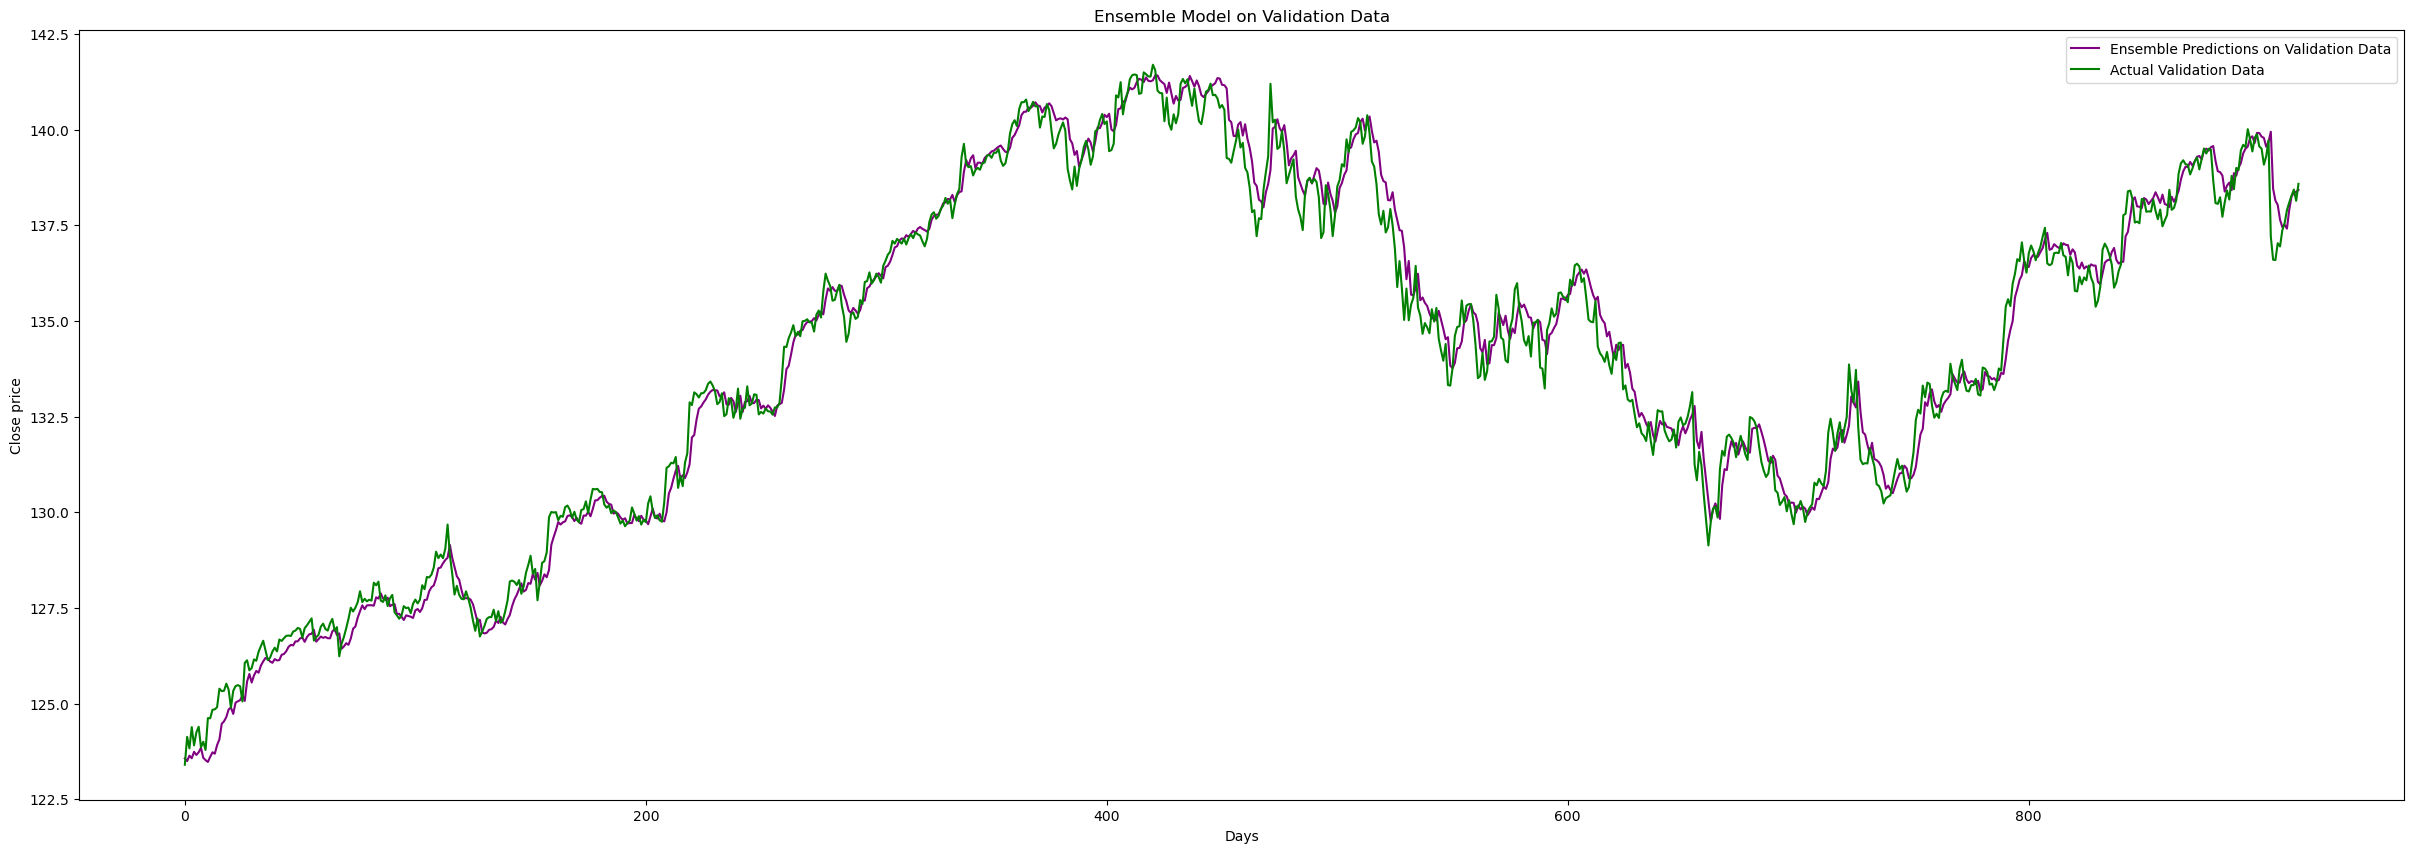

In [121]:
# Visualize ensemble predictions on validation data
plt.figure(figsize=(30, 10))
plt.plot(ensemble_predictions, label="Ensemble Predictions on Validation Data", color="purple")
plt.plot(scaler.inverse_transform(y_test), label="Actual Validation Data", color="green")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Ensemble Model on Validation Data")
plt.legend()
plt.show()

In [122]:
# Calculate RMSE for ensemble predictions
rmse_ensemble = sqrt(mean_squared_error(scaler.inverse_transform(y_test), ensemble_predictions))
print("Ensemble Model RMSE on Validation Data:", rmse_ensemble)


Ensemble Model RMSE on Validation Data: 0.5411699456224883


In [123]:
# Predictions for the next day using the ensemble model
ensemble_input = np.mean([X_input, X_input_cnn], axis=0)  # Using input from RNN and CNN for ensemble
ensemble_prediction = np.mean([simple_RNN_prediction, LSTM_prediction, rf_prediction, cnn_prediction], axis=0)


In [124]:
print("Ensemble Model, Close price prediction for tomorrow:", ensemble_prediction[0, 0])

Ensemble Model, Close price prediction for tomorrow: 135.80508125010905


In [125]:
# Calculate RMSE for each model
rmse_simple_rnn = sqrt(mean_squared_error(scaler.inverse_transform(y_test), y_pred_simple_rnn))
rmse_lstm = sqrt(mean_squared_error(scaler.inverse_transform(y_test), y_pred_lstm))
rmse_rf = sqrt(mean_squared_error(scaler.inverse_transform(y_test), y_pred_rf))
rmse_cnn = sqrt(mean_squared_error(scaler.inverse_transform(y_test), y_pred_cnn))
rmse_ensemble = sqrt(mean_squared_error(scaler.inverse_transform(y_test), ensemble_predictions))

In [126]:
# Print RMSE values
print("RMSE for Simple RNN model:", rmse_simple_rnn)
print("RMSE for LSTM model:", rmse_lstm)
print("RMSE for RandomForest model:", rmse_rf)
print("RMSE for CNN model:", rmse_cnn)
print("RMSE for Ensemble model:", rmse_ensemble)

RMSE for Simple RNN model: 0.8569497601019689
RMSE for LSTM model: 0.4757147815346091
RMSE for RandomForest model: 0.5082042908050038
RMSE for CNN model: 0.9191235036003875
RMSE for Ensemble model: 0.5411699456224883


In [127]:
# Print all predicted Close prices for tomorrow
print("Predicted Close price for tomorrow - Simple RNN model:", simple_RNN_prediction[0, 0])
print("Predicted Close price for tomorrow - LSTM model:", LSTM_prediction[0, 0])
print("Predicted Close price for tomorrow - RandomForest model:", rf_prediction[0, 0])
print("Predicted Close price for tomorrow - CNN model:", cnn_prediction[0, 0])
print("Predicted Close price for tomorrow - Ensemble model:", ensemble_prediction[0, 0])


Predicted Close price for tomorrow - Simple RNN model: 132.52692
Predicted Close price for tomorrow - LSTM model: 133.86955
Predicted Close price for tomorrow - RandomForest model: 138.0237612797331
Predicted Close price for tomorrow - CNN model: 138.8001
Predicted Close price for tomorrow - Ensemble model: 135.80508125010905


In [129]:
# Calculate percentage prediction accuracy for each model
accuracy_simple_rnn = (1 - rmse_simple_rnn / np.mean(scaler.inverse_transform(y_test))) * 100
accuracy_lstm = (1 - rmse_lstm / np.mean(scaler.inverse_transform(y_test))) * 100
accuracy_rf = (1 - rmse_rf / np.mean(scaler.inverse_transform(y_test))) * 100
accuracy_cnn = (1 - rmse_cnn / np.mean(scaler.inverse_transform(y_test))) * 100
accuracy_ensemble = (1 - rmse_ensemble / np.mean(scaler.inverse_transform(y_test))) * 100

# Print percentage prediction accuracy for each model
print("Percentage Prediction Accuracy for Simple RNN model:", accuracy_simple_rnn, "%")
print("Percentage Prediction Accuracy for LSTM model:", accuracy_lstm, "%")
print("Percentage Prediction Accuracy for RandomForest model:", accuracy_rf, "%")
print("Percentage Prediction Accuracy for CNN model:", accuracy_cnn, "%")
print("Percentage Prediction Accuracy for Ensemble model:", accuracy_ensemble, "%")


Percentage Prediction Accuracy for Simple RNN model: 99.36078831823735 %
Percentage Prediction Accuracy for LSTM model: 99.64515720792323 %
Percentage Prediction Accuracy for RandomForest model: 99.6209227955606 %
Percentage Prediction Accuracy for CNN model: 99.31441199025008 %
Percentage Prediction Accuracy for Ensemble model: 99.5963332190914 %


In [132]:
# Calculate range of actual open prices
range_of_open_prices = np.max(scaler.inverse_transform(y_test)) - np.min(scaler.inverse_transform(y_test))

# Calculate percentage prediction accuracy for each model
accuracy_simple_rnn = (1 - rmse_simple_rnn / range_of_open_prices) * 100
accuracy_lstm = (1 - rmse_lstm / range_of_open_prices) * 100
accuracy_rf = (1 - rmse_rf / range_of_open_prices) * 100
accuracy_cnn = (1 - rmse_cnn / range_of_open_prices) * 100
accuracy_ensemble = (1 - rmse_ensemble / range_of_open_prices) * 100

# Print percentage prediction accuracy for each model
print("Percentage Prediction Accuracy for Simple RNN model:", accuracy_simple_rnn, "%")
print("Percentage Prediction Accuracy for LSTM model:", accuracy_lstm, "%")
print("Percentage Prediction Accuracy for RandomForest model:", accuracy_rf, "%")
print("Percentage Prediction Accuracy for CNN model:", accuracy_cnn, "%")
print("Percentage Prediction Accuracy for Ensemble model:", accuracy_ensemble, "%")


Percentage Prediction Accuracy for Simple RNN model: 95.31721324857835 %
Percentage Prediction Accuracy for LSTM model: 97.40046502123924 %
Percentage Prediction Accuracy for RandomForest model: 97.22292667458811 %
Percentage Prediction Accuracy for CNN model: 94.9774659309456 %
Percentage Prediction Accuracy for Ensemble model: 97.04278643904748 %


In [134]:
# Calculate mean of actual open prices
mean_open_prices = np.mean(scaler.inverse_transform(y_test))

# Calculate percentage prediction accuracy for each model
accuracy_simple_rnn = (1 - rmse_simple_rnn / mean_open_prices) * 100
accuracy_lstm = (1 - rmse_lstm / mean_open_prices) * 100
accuracy_rf = (1 - rmse_rf / mean_open_prices) * 100
accuracy_cnn = (1 - rmse_cnn / mean_open_prices) * 100
accuracy_ensemble = (1 - rmse_ensemble / mean_open_prices) * 100

# Print percentage prediction accuracy for each model
print("Percentage Prediction Accuracy for Simple RNN model:", accuracy_simple_rnn, "%")
print("Percentage Prediction Accuracy for LSTM model:", accuracy_lstm, "%")
print("Percentage Prediction Accuracy for RandomForest model:", accuracy_rf, "%")
print("Percentage Prediction Accuracy for CNN model:", accuracy_cnn, "%")
print("Percentage Prediction Accuracy for Ensemble model:", accuracy_ensemble, "%")


Percentage Prediction Accuracy for Simple RNN model: 99.36078831823735 %
Percentage Prediction Accuracy for LSTM model: 99.64515720792323 %
Percentage Prediction Accuracy for RandomForest model: 99.6209227955606 %
Percentage Prediction Accuracy for CNN model: 99.31441199025008 %
Percentage Prediction Accuracy for Ensemble model: 99.5963332190914 %


In [135]:
# Calculate mean of actual open prices and standard deviation
mean_open_prices = np.mean(scaler.inverse_transform(y_test))
std_open_prices = np.std(scaler.inverse_transform(y_test))

# Calculate percentage prediction accuracy for each model
accuracy_simple_rnn = (1 - rmse_simple_rnn / (mean_open_prices + 1.96 * std_open_prices)) * 100
accuracy_lstm = (1 - rmse_lstm / (mean_open_prices + 1.96 * std_open_prices)) * 100
accuracy_rf = (1 - rmse_rf / (mean_open_prices + 1.96 * std_open_prices)) * 100
accuracy_cnn = (1 - rmse_cnn / (mean_open_prices + 1.96 * std_open_prices)) * 100
accuracy_ensemble = (1 - rmse_ensemble / (mean_open_prices + 1.96 * std_open_prices)) * 100

# Print percentage prediction accuracy for each model
print("Percentage Prediction Accuracy for Simple RNN model:", accuracy_simple_rnn, "%")
print("Percentage Prediction Accuracy for LSTM model:", accuracy_lstm, "%")
print("Percentage Prediction Accuracy for RandomForest model:", accuracy_rf, "%")
print("Percentage Prediction Accuracy for CNN model:", accuracy_cnn, "%")
print("Percentage Prediction Accuracy for Ensemble model:", accuracy_ensemble, "%")

Percentage Prediction Accuracy for Simple RNN model: 99.40034756318254 %
Percentage Prediction Accuracy for LSTM model: 99.66711755897641 %
Percentage Prediction Accuracy for RandomForest model: 99.64438295502171 %
Percentage Prediction Accuracy for CNN model: 99.35684135251452 %
Percentage Prediction Accuracy for Ensemble model: 99.62131516719687 %
